# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [214]:
import gdown

# test set: https://drive.google.com/file/d/1Zn1QlOlNFnwyySqyR3YpiWUrge3tWZ5Y/view?usp=drive_link
# Google Drive file ID
train_file_id = "15FT8I1PFCoqunfNZYhKjZLNMOPKFputW"
train_output_file = "Google_Stock_Price_Train.csv"  # Replace with the desired output file name and extension

# Construct the Google Drive download URL
url = f"https://drive.google.com/uc?id={train_file_id}"

# Download the file
gdown.download(url, train_output_file, quiet=False)

print(f"File downloaded as {train_output_file}")

test_file_id = "1Zn1QlOlNFnwyySqyR3YpiWUrge3tWZ5Y"
test_output_file = "Google_Stock_Price_Test.csv"  # Replace with the desired output file name and extension

# Construct the Google Drive download URL
url = f"https://drive.google.com/uc?id={test_file_id}"

# Download the file
gdown.download(url, test_output_file, quiet=False)

print(f"File downloaded as {test_output_file}")


Downloading...
From: https://drive.google.com/uc?id=15FT8I1PFCoqunfNZYhKjZLNMOPKFputW
To: /content/Google_Stock_Price_Train.csv
100%|██████████| 1.03k/1.03k [00:00<00:00, 3.03MB/s]


File downloaded as Google_Stock_Price_Train.csv


Downloading...
From: https://drive.google.com/uc?id=1Zn1QlOlNFnwyySqyR3YpiWUrge3tWZ5Y
To: /content/Google_Stock_Price_Test.csv
100%|██████████| 63.5k/63.5k [00:00<00:00, 63.7MB/s]

File downloaded as Google_Stock_Price_Test.csv


In [215]:
#read from output file

dataset_train = pd.read_csv(train_output_file) # change the path
# Check dataset size and preview the first few rows
print("Full dataset preview:")
print(dataset_train.head())
print(f"Dataset shape: {dataset_train.shape}")

# Check extracted column
print("Extracted column (training_set):")
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)
print(f"Shape of training_set: {training_set.shape}")

Full dataset preview:
       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400
Dataset shape: (20, 6)
Extracted column (training_set):
[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
Shape of training_set: (20, 1)


In [216]:
# Add Gaussian noise to create synthetic data
num_synthetic_points = 120
synthetic_indices = np.linspace(0, len(training_set) - 1, num=num_synthetic_points)
interpolated_values = np.interp(synthetic_indices, np.arange(len(training_set)), training_set.flatten())
noise = np.random.normal(loc=0, scale=2.0, size=num_synthetic_points)
synthetic_data = interpolated_values + noise
synthetic_dataset = pd.DataFrame(synthetic_data, columns=["Open"])
training_set = synthetic_dataset.values


### Feature Scaling

In [217]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = training_set
training_set_scaled = sc.fit_transform(training_set)
print("Shape of training_set:", training_set.shape)
print("Shape of training_set_scaled:", training_set_scaled.shape)


Shape of training_set: (120, 1)
Shape of training_set_scaled: (120, 1)


### Creating a data structure with 60 timesteps and 1 output

In [218]:
num_samples = training_set_scaled.shape[0]
sequence_length = min(60, num_samples)  # Use 60 or the dataset size, whichever is smaller

X_train = []
y_train = []
for i in range(sequence_length, num_samples):
    X_train.append(training_set_scaled[i-sequence_length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [219]:
if X_train.size > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    print(f"X_train shape after reshaping: {X_train.shape}")
else:
    print("X_train is empty. Dataset is too small for the sequence length.")


# Verify the shape matches the expected input shape of the model


X_train shape after reshaping: (60, 60, 1)


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [221]:
regressor = Sequential()

The purpose of the following lines is to introduce you to LSTM.

### Adding the first LSTM layer (units=50) and some Dropout (0.2) regularisation

In [222]:
from tensorflow import keras
from tensorflow.keras import layers

sampling_rate = 6
sequence_length = 60
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

inputs = keras.Input(shape=(sequence_length, 1))
x = layers.LSTM(50)(inputs)
x = layers.Dropout(0.2)(x)

### Adding a second LSTM layer (units=50) and some Dropout (0.2) regularisation

In [223]:
#second lstm layer of units 50 and dropout .2
x = layers.LSTM(50)(inputs)
x = layers.Dropout(0.2)(x)


### Adding a third LSTM layer (units=50) and some Dropout (0.2) regularisation

In [224]:
#second lstm layer of units 50 and dropout .2
x = layers.LSTM(50)(inputs)
x = layers.Dropout(0.2)(x)


### Adding a fourth LSTM layer (units=50) and some Dropout (0.2) regularisation

In [225]:
#second lstm layer of units 50 and dropout .2
x = layers.LSTM(50)(inputs)
x = layers.Dropout(0.2)(x)


### Adding the output layer

In [226]:
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_44 (LSTM)                       │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the RNN with appropriate optimizer and loss function

In [227]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

### Fitting the RNN to the Training set

In [228]:
callbacks = [
    keras.callbacks.ModelCheckpoint("stock_price_lstm.keras",
                                    save_best_only=True)
]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Training
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,  # Add batch size
    callbacks=callbacks
)

X_train shape: (60, 60, 1)
y_train shape: (60,)
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.3431 - mae: 0.5455
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.1720 - mae: 0.3767

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.1612 - mae: 0.3613
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0575 - mae: 0.2044 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0341 - mae: 0.1538 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0391 - mae: 0.1499
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0330 - mae: 0.1499
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0222 - mae: 0.1152
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0252 - mae: 0.1331 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0360 - mae: 0.1495
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0341 - mae: 0.1461


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [229]:
#read from output file

dataset_test = pd.read_csv(test_output_file) # change the path
# Check dataset size and preview the first few rows
print("Full dataset preview:")
print(dataset_test.head())
print(f"Dataset shape: {dataset_train.shape}")

# Check extracted column
print("Extracted column (training_set) real_stock_price:")
real_stock_price = dataset_train.iloc[:, 1:2].values
print(real_stock_price)
print(f"Shape of training_set: {real_stock_price.shape}")


Full dataset preview:
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
Dataset shape: (20, 6)
Extracted column (training_set) real_stock_price:
[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
Shape of training_set: (20, 1)


### Getting the predicted stock price of 2017

In [235]:
# Combine train and test datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
print(f"Combined dataset shape: {dataset_total.shape}")

# Adjust slicing logic for inputs
inputs_start_idx = max(0, len(dataset_total) - len(dataset_test) - sequence_length)
inputs = dataset_total[inputs_start_idx:].values.reshape(-1, 1)
inputs = sc.transform(inputs)
print(f"Prepared inputs. Shape: {inputs.shape}")

# Dynamically adjust sequence length if necessary
sequence_length = min(sequence_length, len(inputs) - 1)

# Create X_test
X_test = []
for i in range(sequence_length, len(inputs)):
    X_test.append(inputs[i-sequence_length:i, 0])

X_test = np.array(X_test)
print(f"Constructed X_test. Shape: {X_test.shape}")

# Check for empty X_test
if X_test.size == 0:
    raise ValueError("X_test is empty. Check dataset and sequence preparation.")

# Reshape X_test for model input
X_test = X_test.reshape((X_test.shape[0], sequence_length, 1))
print(f"X_test reshaped. Final shape: {X_test.shape}")


Combined dataset shape: (1278,)
Prepared inputs. Shape: (1278, 1)
Constructed X_test. Shape: (1218, 60)
X_test reshaped. Final shape: (1218, 60, 1)


### Visualising the results

X_test shape: (1218, 60, 1)
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


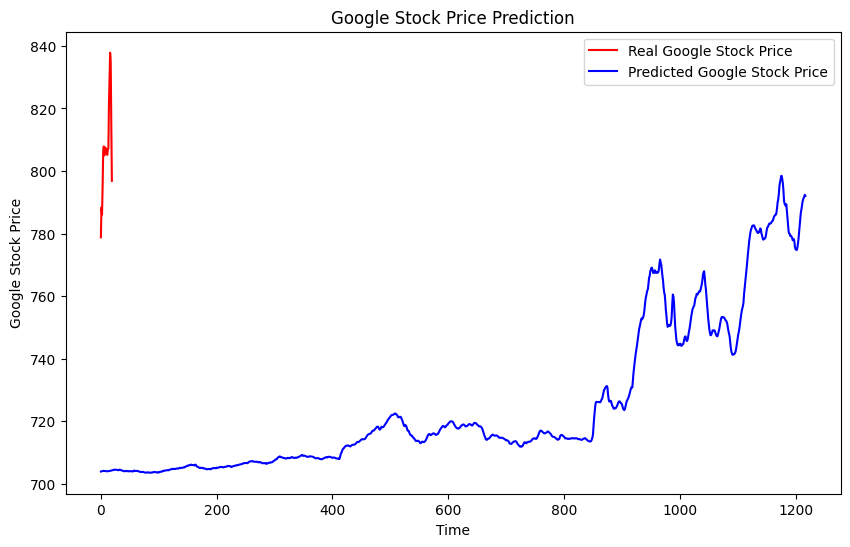

In [236]:
# Create X_test sequences
X_test = []
for i in range(sequence_length, len(inputs)):
    X_test.append(inputs[i-sequence_length:i, 0])

X_test = np.array(X_test)
if X_test.size == 0:
    raise ValueError("X_test is empty. Check the data preparation steps.")
X_test = X_test.reshape((X_test.shape[0], sequence_length, 1))

print(f"X_test shape: {X_test.shape}")

# Predict stock prices
predicted_stock_price = model.predict(X_test)

# Inverse transform to original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()